<a target="_blank" href="https://colab.research.google.com/github/qianniucity/llm_notebooks/blob/main/notebooks/LangChain_Google_Gemini_API.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Google Gemini Pro Usage via Gemini API and LangChain

It's exciting to see, **Gemini Pro** is available via API today.

Here are some key takeaways for developers:

- 32K context window for text, and a larger context window to come
- **free to use right now, within limits**
- features supported: `function calling`, `embeddings`, `semantic retrieval` and `custom knowledge grounding`, and `chat functionality`
- supports 38 languages across 180+ countries and territories worldwide
- Gemini Pro accepts text as input and generates text as output.
- A dedicated Gemini Pro Vision multimodal endpoint available today that accepts text and imagery as input, with text output.

## Get Your API Key

Visit [Google AI Studio](https://makersuite.google.com/) to create your *API Key*.

## Environment Preparation

Let's install the required Python packages. If you are not going to use LangChain, you can skip `langchain-google-genai`.

In [1]:
! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.0 MB/s eta 0:00:00


We could store the Google API Key created in the `.env` file and get it referenced by environmental variable.

```shell
GOOGLE_API_KEY=xxxxxxx
```

In [ ]:
import os
os.environ.setdefault("GOOGLE_API_KEY", "xxxx")

In [2]:
from dotenv import load_dotenv
load_dotenv()

False

## Use Google Generative AI SDK to Access Gemini API

Let's define a helper function `to_markdown` to diplay the model output in a nicer way.

In [3]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

You could refer to the official documentation of the [Generative AI Python SDK](https://ai.google.dev/tutorials/python_quickstart).

In [4]:
import google.generativeai as genai

In [7]:
import os
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

### Text Generation

In [8]:
model = genai.GenerativeModel(model_name = "gemini-pro")

In [9]:
prompt_parts = [
    "Write a Python function and explain it to me",
]

response = model.generate_content(prompt_parts)

In [10]:
print(response.text)

Here's an example of a Python function that calculates the area of a triangle given its base and height:

```
def triangle_area(base, height):
  """Calculates the area of a triangle given its base and height.

  Args:
    base: The length of the base of the triangle in centimeters.
    height: The length of the height of the triangle in centimeters.

  Returns:
    The area of the triangle in square centimeters.
  """

  # Calculate the area of the triangle using the formula:
  # area = (1/2) * base * height
  area = 0.5 * base * height

  return area
```

This function takes two arguments, `base` and `height`, which are the length of the base and height of the triangle in centimeters, respectively.

Inside the function, we use the formula `area = (1/2) * base * height` to calculate the area of the triangle. The `0.5` factor represents the fact that a triangle is half of a parallelogram with the same base and height.

The calculated area is then returned as the result of the function.


### Image Recognition

In this section, we will use the image from [Melody Zimmerman](https://unsplash.com/@roseonajourney) - [https://unsplash.com/photos/a-cup-of-coffee-next-to-a-plate-of-food-baNjp1eJAyo](https://unsplash.com/photos/a-cup-of-coffee-next-to-a-plate-of-food-baNjp1eJAyo)

In [11]:
! pip install pillow

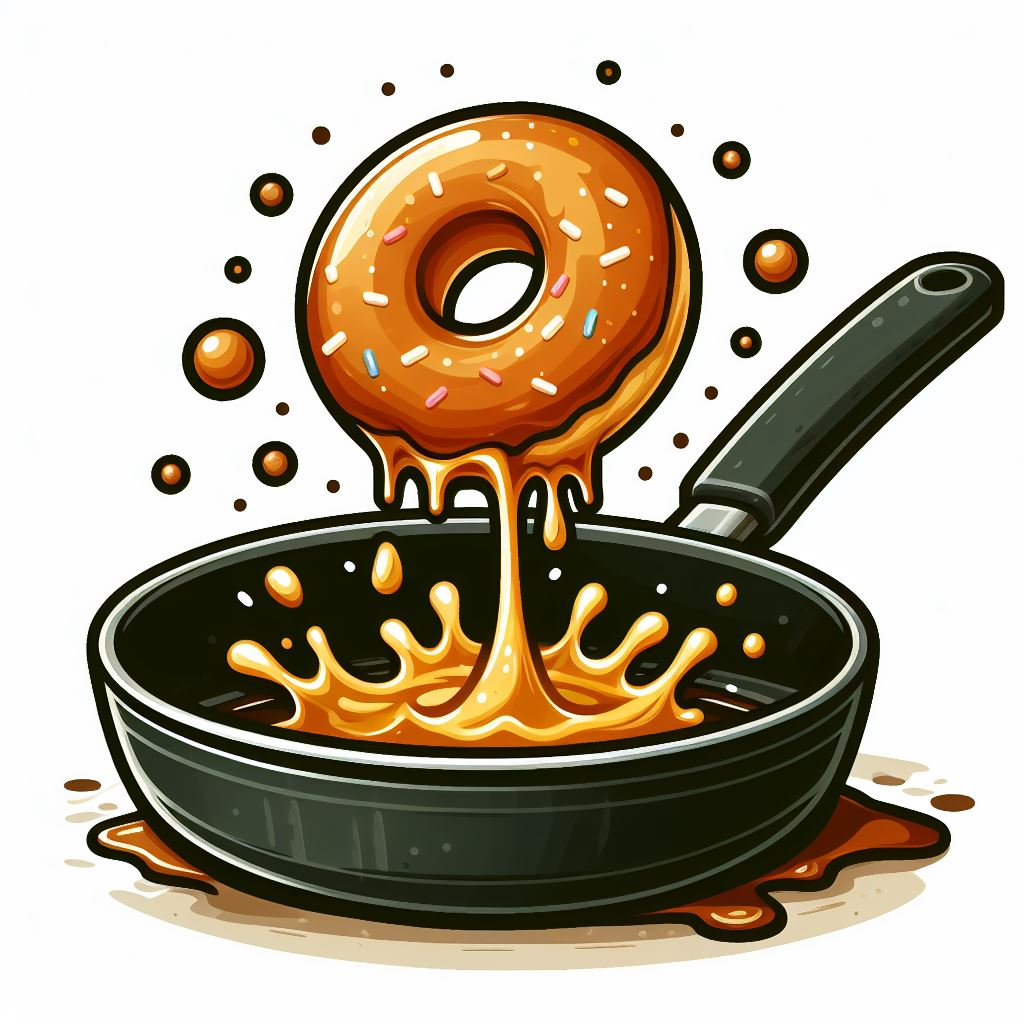

In [16]:
import PIL.Image

img = PIL.Image.open('_e9dba466-2595-48f2-b5dd-e964387d78d7.jpeg')
img

In [17]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)

to_markdown(response.text)

>  A cartoon donut with sprinkles is frying in a pan. The donut is a perfect circle with a hole in the middle. It is brown and has yellow sprinkles on it. The donut is surrounded by a splash of oil. The pan is black and has a long handle.

In [18]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the objects in the photo and talk about my journey in Tokyo.",
        img
    ],
    stream=True
)
response.resolve()

In [19]:
to_markdown(response.text)

>  I'm sure you've heard of the famous Japanese dish, takoyaki. It's a delicious octopus ball that is cooked in a special takoyaki pan. I was lucky enough to try takoyaki when I was visiting Tokyo, and it was one of the best things I ate on my trip.
> 
> The takoyaki pan is a round, cast-iron pan with a series of small, hemispherical indentations. The batter is poured into the indentations, and the octopus is added on top. The pan is then placed over a flame, and the takoyaki are cooked until they are golden brown.
> 
> The takoyaki were delicious! They were crispy on the outside and soft and gooey on the inside. The octopus was tender and flavorful, and the sauce was perfectly sweet and savory. I loved watching the takoyaki being cooked, and I even got to try my hand at making a few myself.
> 
> If you're ever in Tokyo, I highly recommend trying takoyaki. It's a delicious and unique dish that you won't find anywhere else. And if you're feeling adventurous, you can even try making your own!

## Use LangChain to Access Gemini API

LangChain framework provides a wrapper class **ChatGoogleGenerativeAI** to invoke Gemini API.

By default, it looks for Google API Key in environmental variable `GOOGLE_API_KEY`.

In [20]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [21]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("What is the best practice to keep fit?")
to_markdown(result.content)

> 1. **Regular Exercise**: Aim for at least 150 minutes of moderate-intensity aerobic activity or 75 minutes of vigorous-intensity aerobic activity each week, as recommended by the Centers for Disease Control and Prevention (CDC). This could include brisk walking, running, cycling, swimming, or dancing.
> 
> 2. **Strength Training**: Incorporate strength training exercises two to three times per week to build and maintain muscle mass. This can be done using free weights, machines, or bodyweight exercises such as push-ups, squats, and lunges.
> 
> 3. **Flexibility and Mobility**: Improve your flexibility and mobility through regular stretching and mobility exercises. This will help to prevent injuries and improve your range of motion.
> 
> 4. **Balanced Diet**: Eat a healthy and balanced diet that provides your body with the nutrients it needs to function and perform at its best. This includes consuming plenty of fruits, vegetables, whole grains, and lean protein.
> 
> 5. **Hydration**: Drink plenty of water throughout the day to stay hydrated. Staying hydrated helps to regulate body temperature, lubricate joints, and improve performance during exercise.
> 
> 6. **Adequate Sleep**: Get enough sleep each night to allow your body to recover and repair itself. Most adults need around 7-8 hours of sleep per night.
> 
> 7. **Stress Management**: Manage stress through techniques such as meditation, yoga, or deep breathing exercises. Chronic stress can have a negative impact on your physical and mental health, including your fitness goals.
> 
> 8. **Variety and Progression**: To keep your fitness routine interesting and effective, incorporate variety into your workouts and gradually increase the intensity and duration of your workouts as you progress.
> 
> 9. **Warm-Up and Cool-Down**: Always start your workout with a warm-up to prepare your body for exercise and end with a cool-down to help your body recover.
> 
> 10. **Listen to Your Body**: Pay attention to your body's signals. If you experience pain or discomfort, stop the activity and consult with a healthcare professional.

### Advanced Use Cases

In this section, we are going to cover some interesting use cases of Gemini Pro:

1. Chat conversation
2. Safety settings

#### Chat Conversation

Gemini managed conversations between the user and the model across multiple turns.

In [22]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [23]:
response = chat.send_message("What is mixture of expert model?")
response

In [24]:
to_markdown(response.text)

> A mixture of experts model is a probabilistic model that combines the predictions of multiple experts or sub-models to make a final prediction. Each expert is an individual model that is specialized in a specific task or domain. The mixture model learns how to weight the predictions of each expert to produce an overall prediction.
> 
> Here's a mathematical formulation of a mixture of experts model:
> 
> Given a set of input features $X$, the mixture of experts model makes a prediction $Y$ by combining the predictions of $K$ experts:
> 
> $$Y = \sum_{k=1}^K w_k h_k(X)$$
> 
> where:
> 
> - $w_k$ is the weight of the $k$-th expert.
> - $h_k(X)$ is the prediction of the $k$-th expert on the input $X$.
> 
> The weights $w_k$ are typically learned using a maximum likelihood or Bayesian approach. The goal is to find the values of $w_k$ that maximize the likelihood of the observed data given the model.
> 
> Mixture of experts models are often used in situations where the data is complex and can be divided into multiple domains or tasks. For example, a mixture of experts model could be used to predict the price of a house by combining the predictions of experts specialized in different neighborhoods or types of houses.
> 
> Here are some of the advantages of using a mixture of experts model:
> 
> - Improved accuracy: By combining the predictions of multiple experts, mixture of experts models can achieve higher accuracy than individual models.
> - Robustness: Mixture of experts models are more robust to noisy or incomplete data than individual models.
> - Flexibility: Mixture of experts models can be easily adapted to new tasks or domains by adding or removing experts.
> 
> However, mixture of experts models also have some disadvantages:
> 
> - Increased computational cost: Training a mixture of experts model can be more computationally expensive than training individual models.
> - Overfitting: Mixture of experts models are susceptible to overfitting, especially if there are too many experts or if the data is limited.
> - Interpretability: Mixture of experts models can be difficult to interpret, as it is not always clear how each expert contributes to the final prediction.

In [25]:
response = chat.send_message("What was my first question?")
to_markdown(response.text)

> Your first question was:
> 
> > What is mixture of expert model?
> 
> You asked this question on 2023-03-08 at 17:33:14 UTC.
> 
> I hope this helps!

#### Safety Settings

Gemini API enables developers to adjust safety settings on the following 4 dimensions to quickly assess if the application requires more or less restrictive configuration:

- Harassment
- Hate speech
- Sexually explicit
- Dangerous

By default, safety settings block content with medium and/or high probability of being unsafe content across all 4 dimensions, which is designed to work for most use cases. Develpers could also adjust its safety settings as needed.

The probability is rated in general as below:

- Negligible
- Low
- Medium
- High

To understand how it's exactly defined in API, please refer to the following documentation:

- [Harm Category](https://ai.google.dev/api/rest/v1beta/HarmCategory)
- [Harm Probability](https://ai.google.dev/api/rest/v1beta/SafetyRating#HarmProbability)



In [26]:
response = model.generate_content('I am very anger')
response.candidates

[content {
  parts {
    text: "It\'s understandable to feel anger from time to time. Anger is a natural human emotion that can be caused by many different situations. If you\'re feeling very angry, there are a few things you can do to help manage your feelings:\n\n1. **Identify the source of your anger.** What is making you angry? Once you know what\'s causing your anger, you can start to address the issue.\n2. **Take some deep breaths.** Deep breathing can help to calm your body and mind. Inhale slowly and deeply through your nose, and exhale slowly through your mouth.\n3. **Find a healthy way to express your anger.** Exercise, writing, or talking to a trusted friend or family member can be helpful ways to express your anger in a healthy way.\n4. **Avoid acting on your anger.** When you\'re feeling angry, it\'s important to avoid acting on your anger in a way that could hurt yourself or others. Try to walk away from the situation or take some time to calm down before you respond.\n5.

Use `prompt_feedback` attribute of a response to see if it's blocked.

In [27]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

User safety settings in a `generate_content` function call to customize. For example, if you're building a video game dialogue, you may deem it acceptable to allow more content that's rated as dangerous due to the nature of the game.

In [28]:
safety_settings=[
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    }
]

response = model.generate_content(
    'How are you?',
    safety_settings=safety_settings
)
response.candidates

[content {
  parts {
    text: "As an AI language model, I don\'t have personal feelings or emotions, so I don\'t experience being \"good\" or \"bad.\" However, I can inform you that I am functioning optimally and capable of assisting you with a wide range of language-related tasks.\n\nIs there anything specific you would like to ask or know? I\'m here to help you with your language-related needs."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [29]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}